<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/%EF%BC%94%E7%AB%A0%E4%BA%88%E6%B8%AC%E9%96%A2%E6%95%B0%E3%81%AE%E5%AE%9A%E7%BE%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#４章予測関数の定義.ipynb

In [7]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [8]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [9]:
# PyTorch関連ライブラリ
import torch
import torch.nn as nn
from torchviz import make_dot

In [10]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

ビルディングブロック

PyTorchでは「Layer」または「モジュール」という名前で呼ぶ

一次関数はnn.Linear

主なレイヤー関数（パラメータ有無）
*   nn.Linear あり　線形関数
*   nn.Sigmoid なし　シグモイド関数
*   nn.LogSoftmax なし　softmax関数+対数関数
*   nn.ReLu なし　ReLu関数
*   nn.Conv2d あり　畳み込み関数
*   nn.MaxPool2d なし　プーリング関数
*   nn.Flatten なし　一階化関数
*   nn.Dropout　なし　ドロップアウト関数
*   nn.BatchNorm2d あり BN関数
*   nn.AdaptiveAvgPool2d なし　適合的平均プーリング関数


**学習とはレイヤー関数のパラメータ値を調整することを意味する。**

つまり、この書籍だと、下３つ
*   nn.Linear あり　線形関数
*   nn.Conv2d あり　畳み込み関数
*   nn.BatchNorm2d あり BN関数

In [11]:
#レイヤー関数定義
l1 = nn.Linear(784, 128)

#2番目の線形関数
l2 = nn.Linear(128, 10)

#活性化関数
relu = nn.ReLU(inplace=True)

In [12]:
#３つの関数を組み合わせて、入力から出力得る実装例

inputs = torch.randn(100, 784)

m1 = l1(inputs)
m2 = relu(m1)
outputs = l2(m2)

#shapeの確認
print('入力テンソル', inputs.shape)
print('出力テンソル', outputs.shape)

入力テンソル torch.Size([100, 784])
出力テンソル torch.Size([100, 10])


In [14]:
#上のように、直線上につながる合成関数はnn.Sequentialという部品を利用してより簡潔に実装できる。
net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

#入力テンソルと出力テンソルのshape確認
print('入力テンソル', inputs.shape)
print('出力テンソル', outputs２.shape)

入力テンソル torch.Size([100, 784])
出力テンソル torch.Size([100, 10])


In [15]:
#活性化関数の目的
# 訓練データ、検証データの計算
np.random.seed(123)
x = np.random.randn(100,1)

# yの値はx^2に乱数の要素を1/10程度付加した
y = x**2 + np.random.randn(100,1) * 0.1

# データを50件ずつに分け、それぞれ訓練用、検証用とする
x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

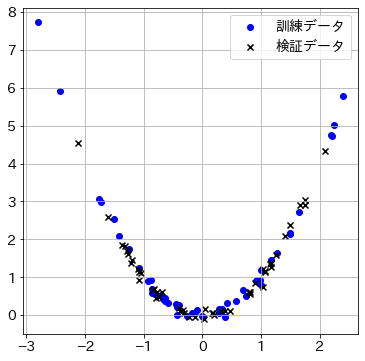

In [16]:
# 散布図表示
plt.scatter(x_train, y_train, c='b', label='訓練データ')
plt.scatter(x_test, y_test, c='k', marker='x', label='検証データ')
plt.legend()
plt.show()

In [18]:
#入力変数xと正解値ytのTensor化
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

In [19]:
import torch.optim as optim

###単回帰

In [21]:
class Net(nn.Module):
    def __init__(self):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(1, 1)   
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [22]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [23]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels)

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 8.26847
Epoch 100 loss: 3.29745
Epoch 200 loss: 3.21687
Epoch 300 loss: 3.21547
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

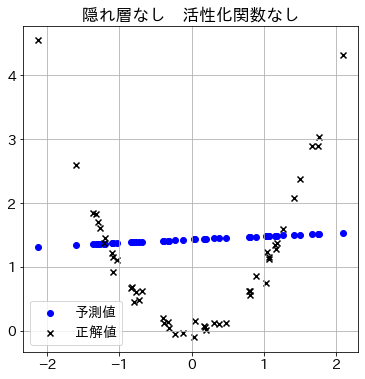

In [24]:
# 結果のグラフ化
labels_pred = net(inputs_test)

plt.title('隠れ層なし　活性化関数なし')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='予測値')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='正解値')
plt.legend()
plt.show()

###ディープラーニング(活性化関数あり)の場合

In [25]:
# モデルの定義

class Net3(nn.Module):
    def __init__(self):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [26]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net3 = Net3()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [27]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net3(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels)

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')


Epoch 0 loss: 5.76847
Epoch 100 loss: 0.55407
Epoch 200 loss: 0.12299
Epoch 300 loss: 0.09335
Epoch 400 loss: 0.07605
Epoch 500 loss: 0.06111
Epoch 600 loss: 0.04980
Epoch 700 loss: 0.04167
Epoch 800 loss: 0.03594
Epoch 900 loss: 0.03125
Epoch 1000 loss: 0.02758
Epoch 1100 loss: 0.02471
Epoch 1200 loss: 0.02219
Epoch 1300 loss: 0.02027
Epoch 1400 loss: 0.01889
Epoch 1500 loss: 0.01791
Epoch 1600 loss: 0.01708
Epoch 1700 loss: 0.01632
Epoch 1800 loss: 0.01574
Epoch 1900 loss: 0.01527
Epoch 2000 loss: 0.01493
Epoch 2100 loss: 0.01467
Epoch 2200 loss: 0.01439
Epoch 2300 loss: 0.01408
Epoch 2400 loss: 0.01384
Epoch 2500 loss: 0.01364
Epoch 2600 loss: 0.01348
Epoch 2700 loss: 0.01276
Epoch 2800 loss: 0.01219
Epoch 2900 loss: 0.01178
Epoch 3000 loss: 0.01147
Epoch 3100 loss: 0.01124
Epoch 3200 loss: 0.01105
Epoch 3300 loss: 0.01090
Epoch 3400 loss: 0.01078
Epoch 3500 loss: 0.01068
Epoch 3600 loss: 0.01059
Epoch 3700 loss: 0.01051
Epoch 3800 loss: 0.01045
Epoch 3900 loss: 0.01038
Epoch 4000 l

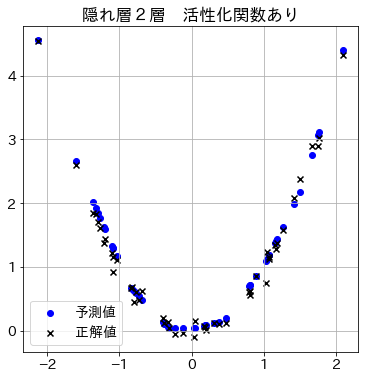

In [28]:
# 結果の可視化
labels_pred3 = net3(inputs_test)

plt.title('隠れ層２層　活性化関数あり')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='予測値')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='正解値')
plt.legend()
plt.show()

ディープラーニングには活性化関数を入れなければいけない。

「非線形関数」と呼ばれる活性化関数を線形関数の間に入れることにより、初めて深い階層のディープラーニングモデルが意味を持つ。

今回はReLU(ランプ関数)

他にも、シグモイド関数や、softmax関数があるが、これれはモデルの出力値を0から1の「確率値」にする。

これらのように線形関数の出力値を整形する利用パターンもある。